In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
# removing unnecesary columns
df.pop('EmployeeCount')
df.pop('EmployeeNumber')
df.pop('Over18')
df.pop('StandardHours')

0       80
1       80
2       80
3       80
4       80
5       80
6       80
7       80
8       80
9       80
10      80
11      80
12      80
13      80
14      80
15      80
16      80
17      80
18      80
19      80
20      80
21      80
22      80
23      80
24      80
25      80
26      80
27      80
28      80
29      80
        ..
1440    80
1441    80
1442    80
1443    80
1444    80
1445    80
1446    80
1447    80
1448    80
1449    80
1450    80
1451    80
1452    80
1453    80
1454    80
1455    80
1456    80
1457    80
1458    80
1459    80
1460    80
1461    80
1462    80
1463    80
1464    80
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64

In [6]:
y=df['Attrition']
X=df
X.pop('Attrition')

0       Yes
1        No
2       Yes
3        No
4        No
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14      Yes
15       No
16       No
17       No
18       No
19       No
20       No
21      Yes
22       No
23       No
24      Yes
25       No
26      Yes
27       No
28       No
29       No
       ... 
1440     No
1441     No
1442    Yes
1443     No
1444    Yes
1445     No
1446     No
1447     No
1448     No
1449     No
1450     No
1451     No
1452    Yes
1453     No
1454     No
1455     No
1456     No
1457     No
1458     No
1459     No
1460     No
1461    Yes
1462     No
1463     No
1464     No
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [7]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [9]:
y=le.fit_transform(y)

In [10]:
# Data Cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime               

In [11]:
df.select_dtypes(['object']).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [12]:
col=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime']
df1=pd.get_dummies(df,prefix_sep='_',columns=col)

In [13]:
df1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [14]:
df1.shape

(1470, 51)

## Decision Tree

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df1, y)
c, _ =y_train.shape
y_train = y_train.reshape(c)

In [17]:
clf = DecisionTreeClassifier(random_state=42)

In [18]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
accuracy_score(y_train,clf.predict(X_train))

1.0

In [21]:
print(classification_report(y_train,clf.predict(X_train)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       907
          1       1.00      1.00      1.00       195

avg / total       1.00      1.00      1.00      1102



In [22]:
confusion_matrix(y_train,clf.predict(X_train))

array([[907,   0],
       [  0, 195]], dtype=int64)

In [23]:
accuracy_score(y_test,clf.predict(X_test))

0.8016304347826086

In [24]:
print(classification_report(y_test,clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.91      0.86      0.88       326
          1       0.25      0.38      0.30        42

avg / total       0.84      0.80      0.82       368



In [25]:
confusion_matrix(y_test,clf.predict(X_test))

array([[279,  47],
       [ 26,  16]], dtype=int64)

In [26]:
from sklearn.grid_search import GridSearchCV

C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [27]:
params = {'max_leaf_nodes':list(range(2,50)),
         'min_samples_split':[2,3,4],'max_depth':[5,10]}

In [28]:
grid_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=params,n_jobs=1,verbose=1)

In [29]:
grid_cv.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:    4.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'min_samples_split': [2, 3, 4], 'max_depth': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [30]:
print(accuracy_score(y_train,grid_cv.predict(X_train)))
print(confusion_matrix(y_train,grid_cv.predict(X_train)))
print(classification_report(y_train,grid_cv.predict(X_train)))

0.8448275862068966
[[883  24]
 [147  48]]
             precision    recall  f1-score   support

          0       0.86      0.97      0.91       907
          1       0.67      0.25      0.36       195

avg / total       0.82      0.84      0.81      1102



In [31]:
print(accuracy_score(y_test,grid_cv.predict(X_test)))
print(confusion_matrix(y_test,grid_cv.predict(X_test)))
print(classification_report(y_test,grid_cv.predict(X_test)))

0.8994565217391305
[[322   4]
 [ 33   9]]
             precision    recall  f1-score   support

          0       0.91      0.99      0.95       326
          1       0.69      0.21      0.33        42

avg / total       0.88      0.90      0.88       368



## Bagging

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
bag_clf = BaggingClassifier(base_estimator=clf,n_estimators=5000,bootstrap=True,n_jobs=1,random_state=42)

In [35]:
def print_score(clf,X_train,y_train, X_test, y_test,train = True):
    '''
    print the accuracy, classification report, confusion matrix of classifier
    '''
    if train:
        '''
        Training Performance
        '''
        
        print("Train Result: \n")
        print('accuracy score: {0:.4f}\n'.format(accuracy_score(y_train,clf.predict(X_train))))
        print('classification_report: \n {}\n'.format(classification_report(y_train,clf.predict(X_train))))
        print('Confusion matrix: \n {} \n'.format(confusion_matrix(y_train,clf.predict(X_train))))
        
        res = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
        print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
        print('Accuracy SD: \t {0:.4f}'.format(np.std(res)))
        
    elif train == False:
        
        '''
        test performance
        '''
        print('Test Result: \n')
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,clf.predict(X_test))))
        print('classification_report: \n {}\n'.format(classification_report(y_test,clf.predict(X_test))))
        print('Confusion matrix: \n {} \n'.format(confusion_matrix(y_test,clf.predict(X_test))))

In [39]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [38]:
print_score(bag_clf,X_train,y_train, X_test, y_test,train=True)
print_score(bag_clf,X_train,y_train, X_test, y_test,train=False)

Train Result: 

accuracy score: 1.0000

classification_report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       907
          1       1.00      1.00      1.00       195

avg / total       1.00      1.00      1.00      1102


Confusion matrix: 
 [[907   0]
 [  0 195]] 

Average Accuracy: 	 0.8448
Accuracy SD: 	 0.0195
Test Result: 

Accuracy Score: 0.8995

classification_report: 
              precision    recall  f1-score   support

          0       0.91      0.99      0.95       326
          1       0.69      0.21      0.33        42

avg / total       0.88      0.90      0.88       368


Confusion matrix: 
 [[322   4]
 [ 33   9]] 



***

### Random Forest 

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf_clf = RandomForestClassifier(random_state=42)

In [72]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [73]:
print_score(rf_clf,X_train,y_train, X_test, y_test,train=True)
print_score(rf_clf,X_train,y_train, X_test, y_test,train=False)

Train Result: 

accuracy score: 0.9855

classification_report: 
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       907
          1       1.00      0.92      0.96       195

avg / total       0.99      0.99      0.99      1102


Confusion matrix: 
 [[907   0]
 [ 16 179]] 

Average Accuracy: 	 0.8367
Accuracy SD: 	 0.0133
Test Result: 

Accuracy Score: 0.8804

classification_report: 
              precision    recall  f1-score   support

          0       0.90      0.97      0.93       326
          1       0.44      0.19      0.27        42

avg / total       0.85      0.88      0.86       368


Confusion matrix: 
 [[316  10]
 [ 34   8]] 



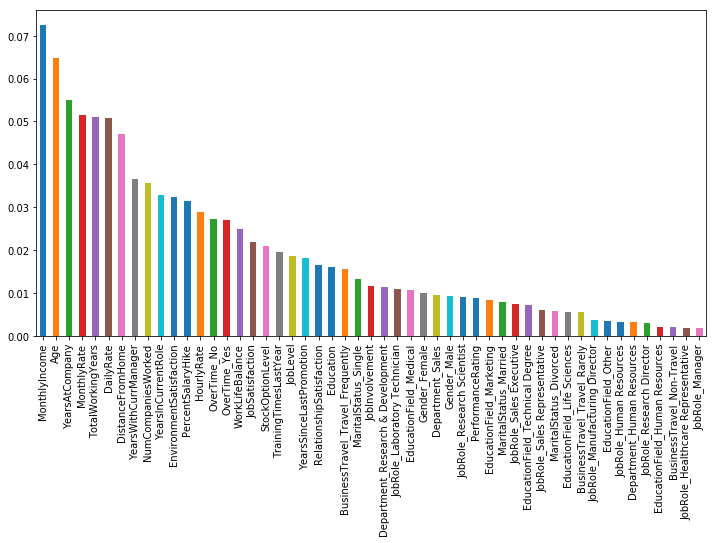

In [74]:
pd.Series(rf_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False).plot(kind='bar',figsize=(12,6))

### GridSearch

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [82]:
params_grid = {'max_depth':[3,5,10,15],
              'min_samples_split':[2,3,6,9,12,15],
              'min_samples_leaf':[1,3,6,9,12,15]}
#grid_search = GridSearchCV(rf_clf,)

In [83]:
grid_search = GridSearchCV(rf_clf,params_grid,
                          n_jobs=-1,cv=5,
                          verbose=1,scoring='accuracy')

In [84]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 10, 15], 'min_samples_split': [2, 3, 6, 9, 12, 15], 'min_samples_leaf': [1, 3, 6, 9, 12, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [85]:
#grid_search.best_params_
#grid_search.best_estimator_
print_score(grid_search,X_train,y_train, X_test, y_test,train=True)
print_score(grid_search,X_train,y_train, X_test, y_test,train=False)

Train Result: 

accuracy score: 0.8730

classification_report: 
              precision    recall  f1-score   support

          0       0.87      1.00      0.93       907
          1       0.94      0.30      0.46       195

avg / total       0.88      0.87      0.84      1102


Confusion matrix: 
 [[903   4]
 [136  59]] 

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    9.8s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    9.3s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   10.3s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   10.2s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   10.3s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   10.7s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    9.1s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    7.3s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    6.8s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    7.4s finished


Average Accuracy: 	 0.8440
Accuracy SD: 	 0.0184
Test Result: 

Accuracy Score: 0.8967

classification_report: 
              precision    recall  f1-score   support

          0       0.90      0.99      0.94       326
          1       0.67      0.19      0.30        42

avg / total       0.88      0.90      0.87       368


Confusion matrix: 
 [[322   4]
 [ 34   8]] 



### AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
ada_clf = AdaBoostClassifier()

In [50]:
ada_clf.fit(X_train,y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [51]:
print_score(ada_clf,X_train,y_train, X_test, y_test,train=True)
print_score(ada_clf,X_train,y_train, X_test, y_test,train=False)

Train Result: 

accuracy score: 0.8929

classification_report: 
              precision    recall  f1-score   support

          0       0.90      0.98      0.94       907
          1       0.83      0.50      0.62       195

avg / total       0.89      0.89      0.88      1102


Confusion matrix: 
 [[887  20]
 [ 98  97]] 

Average Accuracy: 	 0.8466
Accuracy SD: 	 0.0213
Test Result: 

Accuracy Score: 0.9130

classification_report: 
              precision    recall  f1-score   support

          0       0.94      0.97      0.95       326
          1       0.66      0.50      0.57        42

avg / total       0.91      0.91      0.91       368


Confusion matrix: 
 [[315  11]
 [ 21  21]] 



***

### AdaBoost + Random Forest

In [52]:
ada_clf=AdaBoostClassifier(RandomForestClassifier(n_estimators=500))

In [53]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [54]:
print_score(ada_clf,X_train,y_train, X_test, y_test,train=True)
print_score(ada_clf,X_train,y_train, X_test, y_test,train=False)

Train Result: 

accuracy score: 1.0000

classification_report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       907
          1       1.00      1.00      1.00       195

avg / total       1.00      1.00      1.00      1102


Confusion matrix: 
 [[907   0]
 [  0 195]] 

Average Accuracy: 	 0.8448
Accuracy SD: 	 0.0124
Test Result: 

Accuracy Score: 0.8940

classification_report: 
              precision    recall  f1-score   support

          0       0.90      0.99      0.94       326
          1       0.64      0.17      0.26        42

avg / total       0.87      0.89      0.87       368


Confusion matrix: 
 [[322   4]
 [ 35   7]] 



***

### Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gbc_clf = GradientBoostingClassifier()

In [57]:
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [58]:
print_score(gbc_clf,X_train,y_train, X_test, y_test,train=True)
print_score(gbc_clf,X_train,y_train, X_test, y_test,train=False)

Train Result: 

accuracy score: 0.9546

classification_report: 
              precision    recall  f1-score   support

          0       0.95      1.00      0.97       907
          1       0.99      0.75      0.85       195

avg / total       0.96      0.95      0.95      1102


Confusion matrix: 
 [[906   1]
 [ 49 146]] 

Average Accuracy: 	 0.8475
Accuracy SD: 	 0.0209
Test Result: 

Accuracy Score: 0.9103

classification_report: 
              precision    recall  f1-score   support

          0       0.91      0.99      0.95       326
          1       0.85      0.26      0.40        42

avg / total       0.91      0.91      0.89       368


Confusion matrix: 
 [[324   2]
 [ 31  11]] 



***

### XGBoost

In [59]:
import xgboost as xgb

In [66]:
xgb_clf = xgb.XGBClassifier(max_depth=5,random_state=42,n_estimators=5000)

In [67]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=5000,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [68]:
print_score(xgb_clf,X_train,y_train, X_test, y_test,train=True)
print_score(xgb_clf,X_train,y_train, X_test, y_test,train=False)

Train Result: 

accuracy score: 1.0000



C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


classification_report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       907
          1       1.00      1.00      1.00       195

avg / total       1.00      1.00      1.00      1102


Confusion matrix: 
 [[907   0]
 [  0 195]] 



C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning Fals

Average Accuracy: 	 0.8511
Accuracy SD: 	 0.0263
Test Result: 

Accuracy Score: 0.8886

classification_report: 
              precision    recall  f1-score   support

          0       0.92      0.96      0.94       326
          1       0.52      0.36      0.42        42

avg / total       0.87      0.89      0.88       368


Confusion matrix: 
 [[312  14]
 [ 27  15]] 



C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning Fals